In [2]:
from google.colab import files
uploded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
import pandas as pd
import numpy as np


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")


print(titanic_data.head())

print(titanic_data.info())

print(titanic_data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [37]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin', 'Ticket'], inplace=True)

In [38]:
label_enc = LabelEncoder()
titanic_data['Sex'] = label_enc.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_enc.fit_transform(titanic_data['Embarked'])


In [39]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



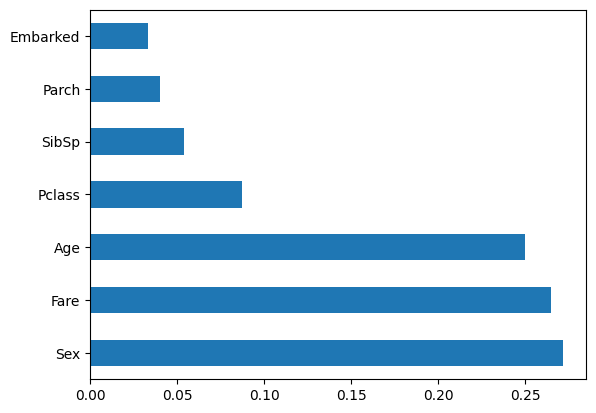

In [43]:
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

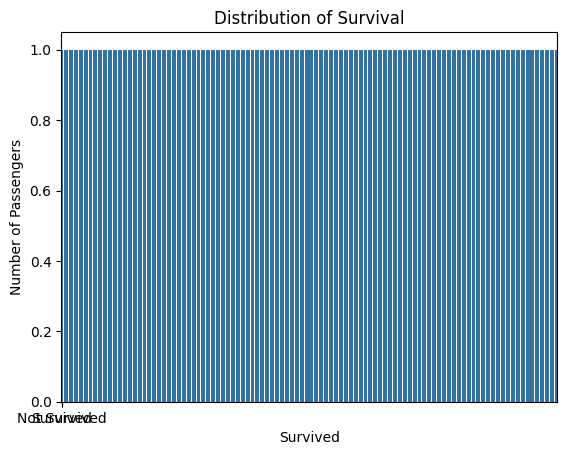

In [44]:
sns.countplot(titanic_data['Survived'])
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

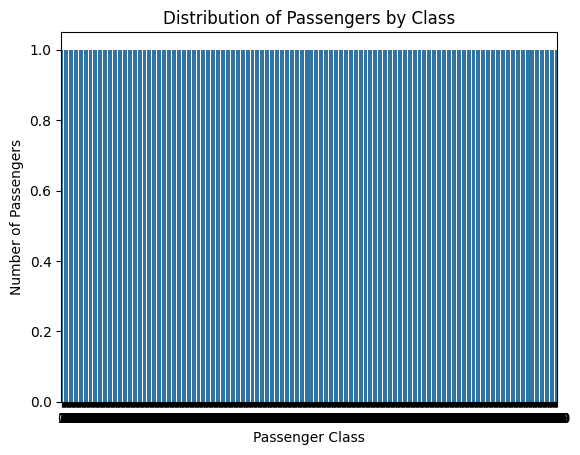

In [45]:
sns.countplot(titanic_data['Pclass'])
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()


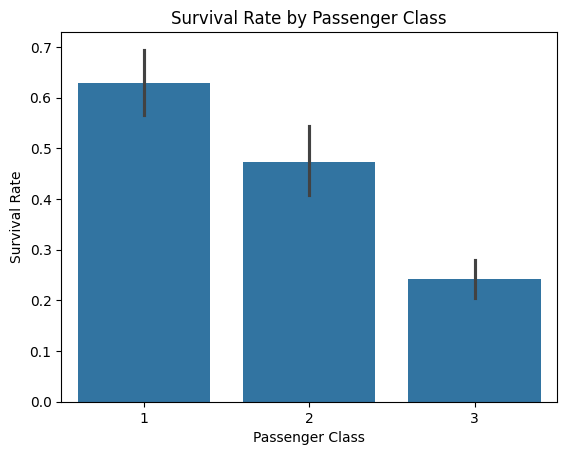

In [46]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

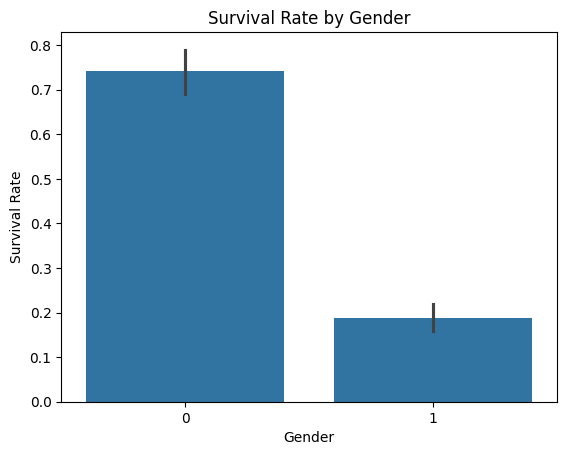

In [47]:
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

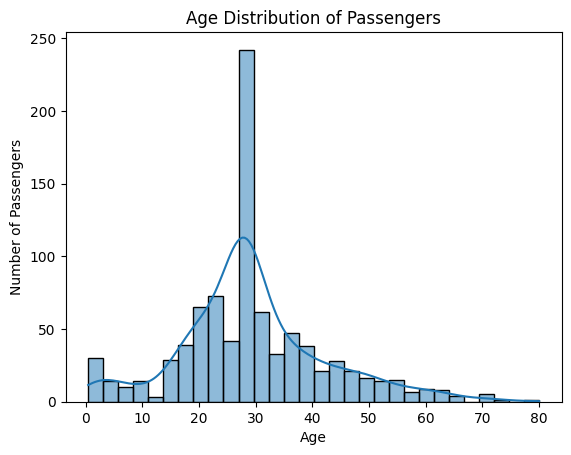

In [48]:
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

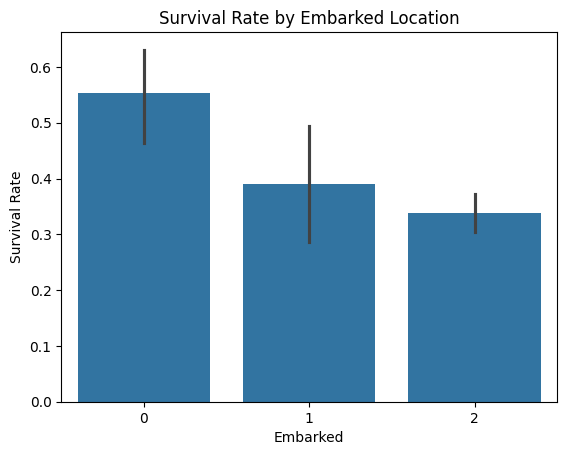

In [49]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


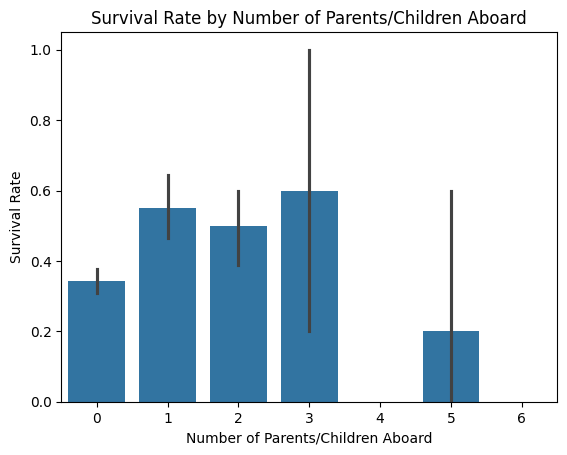

In [50]:
sns.barplot(x='Parch', y='Survived', data=titanic_data)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()